In [1]:
!pip install dgl -f https://data.dgl.ai/wheels/repo.html

!pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html

Looking in links: https://data.dgl.ai/wheels/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.4 MB/s eta 0:00:00
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 39.6 MB/s eta 0:00:00
  Pr

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


import libraries

In [3]:
%matplotlib inline
import os

os.environ["DGLBACKEND"] = "pytorch"   #specifies that DGL should use PyTorch as the backend for operations on graphs
import dgl
import numpy as np
import networkx as nx
import torch
import torch.nn as nn
import dgl.function as fn               #contains a collection of built-in message-passing functions
import torch.nn.functional as F         #provides a set of functions that can be used to define the behavior of neural network layers (F.relu())
import shutil                           #provides a set of high-level operations on files and collections of files, such as copying, moving, and deleting files and directories.
from torch.utils.data import DataLoader
import cloudpickle                      #provides the ability to serialize and deserialize complex Python objects.
from dgl.nn import GraphConv

In [4]:
current_dir = "/content/drive/MyDrive/Graph/"
checkpoint_path = current_dir + "save_models/model_checkpoints/" + "checkpoint"
os.makedirs(checkpoint_path, exist_ok=True) #files for saving and resuming training,
                                            #evaluating model performance,
                                            #and making predictions on new data.


best_model_path = current_dir + "save_models/best_model/"

folder_data_temp = current_dir +"data_temp/" #store data that is only needed temporarily,
                                             #such as intermediate results or temporary copies of files.

shutil.rmtree(folder_data_temp, ignore_errors=True) #function can be used to delete a directory and
                                                    #its contents when it is no longer needed.

path_save = current_dir + "graph_dataset.zip"       #bbbp dataset
shutil.unpack_archive(path_save, folder_data_temp) #This function automatically detects the archive
                                                   #format and extracts the contents to the specified directory.

In [5]:
train_graph = dgl.load_graphs('/content/drive/MyDrive/Graph/data_temp/scaffold_0_train.bin')
train_graph

([Graph(num_nodes=8, num_edges=14,
        ndata_schemes={'v': Scheme(shape=(128,), dtype=torch.float32)}
        edata_schemes={'e': Scheme(shape=(13,), dtype=torch.float32)}),
  Graph(num_nodes=2, num_edges=2,
        ndata_schemes={'v': Scheme(shape=(128,), dtype=torch.float32)}
        edata_schemes={'e': Scheme(shape=(13,), dtype=torch.float32)}),
  Graph(num_nodes=9, num_edges=16,
        ndata_schemes={'v': Scheme(shape=(128,), dtype=torch.float32)}
        edata_schemes={'e': Scheme(shape=(13,), dtype=torch.float32)}),
  Graph(num_nodes=4, num_edges=6,
        ndata_schemes={'v': Scheme(shape=(128,), dtype=torch.float32)}
        edata_schemes={'e': Scheme(shape=(13,), dtype=torch.float32)}),
  Graph(num_nodes=1, num_edges=0,
        ndata_schemes={'v': Scheme(shape=(128,), dtype=torch.float32)}
        edata_schemes={'e': Scheme(shape=(20,), dtype=torch.float32)}),
  Graph(num_nodes=10, num_edges=18,
        ndata_schemes={'v': Scheme(shape=(128,), dtype=torch.float32)}
      

In [6]:
type(train_graph)

tuple

In [7]:
train_graph[0][0]

Graph(num_nodes=8, num_edges=14,
      ndata_schemes={'v': Scheme(shape=(128,), dtype=torch.float32)}
      edata_schemes={'e': Scheme(shape=(13,), dtype=torch.float32)})

In [8]:
train_graph[1]['masks']

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [10]:
train_graph[1]['masks'].unique()#all of masks are 1 then we don't need mask in this project.

tensor([1.])

In [9]:
train_graph[1]['labels']

tensor([[1.],
        [1.],
        [1.],
        ...,
        [0.],
        [1.],
        [1.]])

In [11]:
train_graph[1]['labels'].unique() #only 2 labels

tensor([0., 1.])

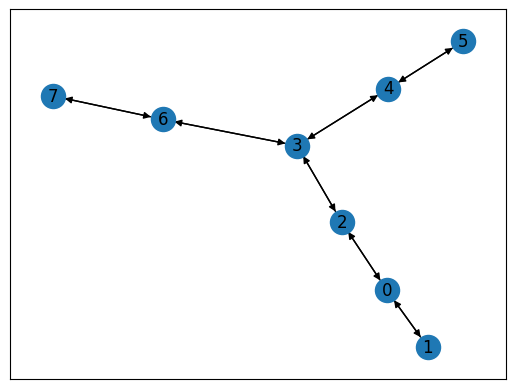

In [12]:
nx.draw_networkx(train_graph[0][0].to_networkx(), with_labels = True) #one of the graph in training set.

Classification Dataset

In [13]:
class DGLDatasetClass(torch.utils.data.Dataset):
    def __init__(self, address):
            self.address=address+".bin"
            self.list_graphs, train_labels_globals = dgl.load_graphs(self.address) # load graphs and extract the labels, and globals for the graphs.
            num_graphs =len(self.list_graphs) #number of graphs in the datase
            self.labels = train_labels_globals["labels"].view(num_graphs,-1)
            self.globals = train_labels_globals["globals"].view(num_graphs,-1)
    def __len__(self):
        return len(self.list_graphs)
    def __getitem__(self, idx):
        return  self.list_graphs[idx], self.labels[idx], self.globals[idx] #This tuple represents a single example from the dataset.

Train_validation_test set

In [14]:
path_data_temp = folder_data_temp + "scaffold"+"_"+str(0)
train_set = DGLDatasetClass(address=path_data_temp+"_train")
val_set = DGLDatasetClass(address=path_data_temp+"_val")
test_set = DGLDatasetClass(address=path_data_temp+"_test")

print('Size of train set : {}, Size of validation set : {}, Size of test set : {}'.format(len(train_set), len(val_set), len(test_set)))

Size of train set : 1631, Size of validation set : 203, Size of test set : 205


Data Loader

In [15]:
#The collate_fn argument specifies the function that should be used to collate the data from each batch into a single batch
def collate(batch):
    # batch is a list of tuples (graphs, labels, globals)
    # Concatenate a sequence of graphs
    graphs = [e[0] for e in batch]
    g = dgl.batch(graphs)

    # Concatenate a sequence of tensors (labels) along a new dimension
    labels = [e[1] for e in batch]
    labels = torch.stack(labels, 0)

    # Concatenate a sequence of tensors (globals) along a new dimension
    globals = [e[2] for e in batch]
    globals = torch.stack(globals, 0)

    return g, labels, globals


def loader(batch_size=64):
    train_dataloader = DataLoader(train_set,
                              batch_size=batch_size,
                              collate_fn=collate,
                              drop_last=False, #the last batch will be included even if it is smaller than the specified batch size.
                              shuffle=True,
                              num_workers=1) #specifies the number of worker processes that should be used to load the data in parallel.

    val_dataloader =  DataLoader(val_set,
                             batch_size=batch_size,
                             collate_fn=collate,
                             drop_last=False,
                             shuffle=False,
                             num_workers=1)

    test_dataloader = DataLoader(test_set,
                             batch_size=batch_size,
                             collate_fn=collate,
                             drop_last=False,
                             shuffle=False,
                             num_workers=1)
    return train_dataloader, val_dataloader, test_dataloader

In [16]:
train_dataloader, val_dataloader, test_dataloader = loader(batch_size=64)

Some variables

In [17]:
num_tasks = 1     #bbbp dataset has 1 task.
global_size = 200 # Size of global feature of each graph
num_epochs = 100  # Number of epochs to train the model
patience = 10     # Number of steps to wait if the model performance on the validation set does not improve

#Configurations to instantiate the model
config = {"node_feature_size":127, "edge_feature_size":12, "hidden_size":100}

Defining GNN

In [18]:
# MODEL(1) :two GraphConv layers

class GNN(nn.Module):
    def __init__(self, config, global_size = 200, num_tasks = 1):
        super().__init__()
        self.config = config
        self.num_tasks = num_tasks

        # Node feature size
        self.node_feature_size = self.config.get('node_feature_size', 127)  #returns the value associated with the key in the dictionary. If the key is not found in the dictionary, the method returns the default value 127.

        # Edge feature size
        self.edge_feature_size = self.config.get('edge_feature_size', 12)

        # Hidden size
        self.hidden_size = self.config.get('hidden_size', 100)

        self.conv1 = GraphConv(self.node_feature_size, self.hidden_size, allow_zero_in_degree=True ) #The allow_zero_in_degree parameter is set to True to allow nodes with zero incoming edges.
        self.conv2 = GraphConv(self.hidden_size, self.num_tasks, allow_zero_in_degree=True )

    # def forward(self, g, in_feat):
    def forward(self, mol_dgl_graph, globals):
        mol_dgl_graph.ndata["v"]= mol_dgl_graph.ndata["v"][:,:self.node_feature_size]  #represents the node features and is sliced to the size of self.node_feature_size
        mol_dgl_graph.edata["e"] = mol_dgl_graph.edata["e"][:,:self.edge_feature_size] #represents the edge features and is sliced to the size of self.edge_feature_size.
        h = self.conv1(mol_dgl_graph, mol_dgl_graph.ndata["v"])
        h = F.relu(h)
        h = self.conv2(mol_dgl_graph, h)
        mol_dgl_graph.ndata["h"] = h
        return dgl.mean_nodes(mol_dgl_graph, "h") #The node-level representation is then aggregated to a single graph-level representation

Compute score of the model ---> ROC_AUC

In [19]:
from sklearn.metrics import roc_auc_score

def compute_score(model, data_loader, val_size, num_tasks):
    model.eval()  #switch for some specific parts of the model that behave differently during training and evaluating time
    metric = roc_auc_score
    with torch.no_grad(): #turn off gradients computation
        prediction_all= torch.empty(0)
        labels_all= torch.empty(0)
        masks_all= torch.empty(0)
        for i, (mol_dgl_graph, labels, globals) in enumerate(data_loader): #iterates over each batch of the DataLoader and computes the model's predictions for the batch.
            prediction = model(mol_dgl_graph, globals)
            prediction = torch.sigmoid(prediction) #The predictions are passed through a sigmoid function to convert them to probabilities
            prediction_all = torch.cat((prediction_all, prediction), 0)
            labels_all = torch.cat((labels_all, labels), 0)
        average = torch.tensor([0.])
        for i in range(num_tasks): # computes the average ROC AUC score over all the tasks (here we have 1 task)
            a1 = prediction_all[:, i]
            a2 = labels_all[:, i]
            try:
                t = metric(a2.int().cpu(), a1.cpu()).item()
            except ValueError: #happen if all the labels are the same, the score t is set to 0.
                t = 0
            average += t
    return average.item()/num_tasks

Defining loss function

In [20]:
def loss_func(output, label, num_tasks):
    pos_weight = torch.ones((1, num_tasks))
    pos_weight #positive examples are weighted equally with negative examples.
    criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    loss = criterion(output,label)
    loss = loss.sum()
    return loss

training

In [21]:
def train_epoch(train_dataloader, model, optimizer):  # trains the model for one epoch on the training set and returns the average training loss over the epoch
    epoch_train_loss = 0
    iterations = 0
    model.train() # Prepare model for training
    for i, (mol_dgl_graph, labels, globals) in enumerate(train_dataloader): # iterates over each batch in the training DataLoader
        prediction = model(mol_dgl_graph, globals)
        loss_train = loss_func(prediction, labels, num_tasks)
        optimizer.zero_grad(set_to_none=True) #clear any previous gradients that might still be stored in the optimizer.
        loss_train.backward() #update the model's parameters based
        optimizer.step()
        epoch_train_loss += loss_train.detach().item()
        iterations += 1
    epoch_train_loss /= iterations
    return epoch_train_loss

In [22]:
def train_evaluate():  #The function saves the best model checkpoint based on the validation score and returns the average validation score over the best checkpoints.

    model = GNN(config, global_size, num_tasks)
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

    best_val = 0
    patience_count = 1
    epoch = 1

    while epoch <= num_epochs:
        if patience_count <= patience: #checks whether the patience count has exceeded the specified patience patience. If not:
            model.train()  #it trains the model for one epoch using the train_epoch function
            loss_train = train_epoch(train_dataloader, model, optimizer)
            model.eval()
            score_val = compute_score(model, val_dataloader, len(val_set), num_tasks) #computes the validation score using the compute_score function.

            if score_val > best_val: #If the validation score is better than the current best validation score, the function saves the model checkpoint
                                     #to a file using cloudpickle, updates the best_val variable, and resets the patience_count to 1. Otherwise,
                                     #it increments the patience_count by 1
                best_val = score_val
                print("Save checkpoint")
                path = os.path.join(checkpoint_path, 'checkpoint.pth')
                dict_checkpoint = {"score_val": score_val}
                dict_checkpoint.update({"model_state_dict": model.state_dict(), "optimizer_state": optimizer.state_dict()})

                with open(path, "wb") as outputfile: #open function is called to open the file specified by the path variable in binary write mode ("wb").
                                                     #Binary write mode ("wb") is a file mode in Python that is used to open a file for writing binary data.
                                                     #In binary mode, the data is written to the file as a sequence of bytes, rather than as text characters.
                    cloudpickle.dump(dict_checkpoint, outputfile) #serialize the dict_checkpoint dictionary and write the resulting bytes to the open file.
                patience_count = 1
            else:
                print("Patience", patience_count)
                patience_count += 1

            print("Epoch: {}/{} | Training Loss: {:.3f} | Valid Score: {:.3f}".format(
            epoch, num_epochs, loss_train, score_val))

            print(" ")
            print("Epoch: {}/{} | Best Valid Score Until Now: {:.3f}".format(epoch, num_epochs, best_val), "\n")
        epoch += 1

    # best model save
    # Once the loop finishes, the function saves the best model checkpoint to a directory named best_model_path and prints the final average validation score
    # based on the best checkpoints.
    shutil.rmtree(best_model_path, ignore_errors=True) #remove the best_model_path directory and its contents if it already exists.
                                                       #The ignore_errors=True argument is provided to ignore any errors that might occur if the directory does not exist.
    shutil.copytree(checkpoint_path, best_model_path)

    print("Final results:")
    print("Average Valid Score: {:.3f}".format(np.mean(best_val)), "\n")


In [23]:
#evaluates the final GNN model on a test set and prints the test score.
def test_evaluate():
    final_model = GNN(config, global_size, num_tasks)
    path = os.path.join(best_model_path, 'checkpoint.pth') #loads the best model checkpoint from the best_model_path directory using cloudpickle.load,
                                                            #which reads the serialized dictionary from the file and returns it as a Python object.
    with open(path, 'rb') as f:
        checkpoint = cloudpickle.load(f)
    final_model.load_state_dict(checkpoint["model_state_dict"])
    final_model.eval()
    test_score = compute_score(final_model, test_dataloader, len(test_set), num_tasks) #The function then computes the test score using the compute_score function on the test DataLoader

    print("Test Score: {:.3f}".format(test_score), "\n")
    print("Execution time: {:.3f} seconds".format(time.time() - start_time))


In [ ]:
import time
start_time = time.time()

train_evaluate()
test_evaluate()

Save checkpoint
Epoch: 1/100 | Training Loss: 0.651 | Valid Score: 0.325
 
Epoch: 1/100 | Best Valid Score Until Now: 0.325 

Patience 1
Epoch: 2/100 | Training Loss: 0.627 | Valid Score: 0.313
 
Epoch: 2/100 | Best Valid Score Until Now: 0.325 

Patience 2
Epoch: 3/100 | Training Loss: 0.613 | Valid Score: 0.313
 
Epoch: 3/100 | Best Valid Score Until Now: 0.325 

Patience 3
Epoch: 4/100 | Training Loss: 0.606 | Valid Score: 0.315
 
Epoch: 4/100 | Best Valid Score Until Now: 0.325 

Patience 4
Epoch: 5/100 | Training Loss: 0.598 | Valid Score: 0.323
 
Epoch: 5/100 | Best Valid Score Until Now: 0.325 

Save checkpoint
Epoch: 6/100 | Training Loss: 0.595 | Valid Score: 0.333
 
Epoch: 6/100 | Best Valid Score Until Now: 0.333 

Save checkpoint
Epoch: 7/100 | Training Loss: 0.588 | Valid Score: 0.345
 
Epoch: 7/100 | Best Valid Score Until Now: 0.345 

Save checkpoint
Epoch: 8/100 | Training Loss: 0.585 | Valid Score: 0.359
 
Epoch: 8/100 | Best Valid Score Until Now: 0.359 

Save checkpo

In [ ]:
class Desired_GNN_1(nn.Module):
    def __init__(self, in_feat, out_feat):
        super(Desired_GNN_1, self).__init__()
        # A linear submodule for projecting the input and neighbor feature to the output.
        self.linear = nn.Linear(in_feat * 2, out_feat)

    def forward(self, g, h):

        with g.local_scope():
            g.ndata["h"] = h
            # update_all is a message passing API.
            g.update_all(
                message_func=fn.u_add_v('h', 'h', 'm'),
                reduce_func=fn.mean("m", "h_N"),
            )
            h_N = g.ndata["h_N"]
            h_total = torch.cat([h, h_N], dim=1)
            return self.linear(h_total)

In [ ]:
#MODEL(2)

class GNN(nn.Module):
    def __init__(self, config, global_size = 200, num_tasks = 1):
        super().__init__()
        self.config = config
        self.num_tasks = num_tasks

        # Node feature size
        self.node_feature_size = self.config.get('node_feature_size', 127)

        # Edge feature size
        self.edge_feature_size = self.config.get('edge_feature_size', 12)

        # Hidden size
        self.hidden_size = self.config.get('hidden_size', 100)

        self.conv1 = Desired_GNN_1(self.node_feature_size, self.hidden_size )
        self.conv2 = Desired_GNN_1(self.hidden_size, self.num_tasks )

    # def forward(self, g, in_feat):
    def forward(self, mol_dgl_graph, globals):
        mol_dgl_graph.ndata["v"]= mol_dgl_graph.ndata["v"][:,:self.node_feature_size]
        mol_dgl_graph.edata["e"] = mol_dgl_graph.edata["e"][:,:self.edge_feature_size]
        h = self.conv1(mol_dgl_graph, mol_dgl_graph.ndata["v"])
        h = F.relu(h)
        h = self.conv2(mol_dgl_graph, h)
        mol_dgl_graph.ndata["h"] = h
        return dgl.mean_nodes(mol_dgl_graph, "h")

In [ ]:
import time
start_time = time.time()

train_evaluate()
test_evaluate()

Save checkpoint
Epoch: 1/100 | Training Loss: 0.691 | Valid Score: 0.271
 
Epoch: 1/100 | Best Valid Score Until Now: 0.271 

Patience 1
Epoch: 2/100 | Training Loss: 0.634 | Valid Score: 0.269
 
Epoch: 2/100 | Best Valid Score Until Now: 0.271 

Save checkpoint
Epoch: 3/100 | Training Loss: 0.611 | Valid Score: 0.288
 
Epoch: 3/100 | Best Valid Score Until Now: 0.288 

Save checkpoint
Epoch: 4/100 | Training Loss: 0.596 | Valid Score: 0.314
 
Epoch: 4/100 | Best Valid Score Until Now: 0.314 

Save checkpoint
Epoch: 5/100 | Training Loss: 0.591 | Valid Score: 0.343
 
Epoch: 5/100 | Best Valid Score Until Now: 0.343 

Save checkpoint
Epoch: 6/100 | Training Loss: 0.584 | Valid Score: 0.382
 
Epoch: 6/100 | Best Valid Score Until Now: 0.382 

Save checkpoint
Epoch: 7/100 | Training Loss: 0.576 | Valid Score: 0.446
 
Epoch: 7/100 | Best Valid Score Until Now: 0.446 

Save checkpoint
Epoch: 8/100 | Training Loss: 0.573 | Valid Score: 0.497
 
Epoch: 8/100 | Best Valid Score Until Now: 0.497

In [ ]:
class Desired_GNN_2(nn.Module):

    def __init__(self, in_feat, out_feat):
        super(Desired_GNN_2, self).__init__()
        # A linear submodule for projecting the input and neighbor feature to the output.
        self.linear = nn.Linear(in_feat * 2, out_feat)

    def forward(self, g, h):

        with g.local_scope():
            g.ndata["h"] = h
            # update_all is a message passing API.
            g.update_all(
                message_func=fn.u_mul_v('h', 'h', 'm'),
                reduce_func=fn.sum("m", "h_N"),
            )
            h_N = g.ndata["h_N"]
            h_total = torch.cat([h, h_N], dim=1)
            return self.linear(h_total)

In [ ]:
#MODEL(3)

class GNN(nn.Module):
    def __init__(self, config, global_size = 200, num_tasks = 1):
        super().__init__()
        self.config = config
        self.num_tasks = num_tasks

        # Node feature size
        self.node_feature_size = self.config.get('node_feature_size', 127)

        # Edge feature size
        self.edge_feature_size = self.config.get('edge_feature_size', 12)

        # Hidden size
        self.hidden_size = self.config.get('hidden_size', 100)

        self.conv1 = Desired_GNN_2(self.node_feature_size, self.hidden_size )
        self.conv2 = Desired_GNN_2(self.hidden_size, self.num_tasks )

    # def forward(self, g, in_feat):
    def forward(self, mol_dgl_graph, globals):
        mol_dgl_graph.ndata["v"]= mol_dgl_graph.ndata["v"][:,:self.node_feature_size]
        mol_dgl_graph.edata["e"] = mol_dgl_graph.edata["e"][:,:self.edge_feature_size]
        h = self.conv1(mol_dgl_graph, mol_dgl_graph.ndata["v"])
        h = F.relu(h)
        h = self.conv2(mol_dgl_graph, h)
        mol_dgl_graph.ndata["h"] = h
        return dgl.mean_nodes(mol_dgl_graph, "h")

In [ ]:
import time
start_time = time.time()

train_evaluate()
test_evaluate()

Save checkpoint
Epoch: 1/100 | Training Loss: 0.655 | Valid Score: 0.505
 
Epoch: 1/100 | Best Valid Score Until Now: 0.505 

Patience 1
Epoch: 2/100 | Training Loss: 0.632 | Valid Score: 0.466
 
Epoch: 2/100 | Best Valid Score Until Now: 0.505 

Patience 2
Epoch: 3/100 | Training Loss: 0.618 | Valid Score: 0.464
 
Epoch: 3/100 | Best Valid Score Until Now: 0.505 

Save checkpoint
Epoch: 4/100 | Training Loss: 0.601 | Valid Score: 0.507
 
Epoch: 4/100 | Best Valid Score Until Now: 0.507 

Save checkpoint
Epoch: 5/100 | Training Loss: 0.583 | Valid Score: 0.533
 
Epoch: 5/100 | Best Valid Score Until Now: 0.533 

Save checkpoint
Epoch: 6/100 | Training Loss: 0.568 | Valid Score: 0.549
 
Epoch: 6/100 | Best Valid Score Until Now: 0.549 

Save checkpoint
Epoch: 7/100 | Training Loss: 0.555 | Valid Score: 0.581
 
Epoch: 7/100 | Best Valid Score Until Now: 0.581 

Save checkpoint
Epoch: 8/100 | Training Loss: 0.541 | Valid Score: 0.602
 
Epoch: 8/100 | Best Valid Score Until Now: 0.602 

Sa

In [ ]:
#MODEL(4)

class GNN(nn.Module):
    def __init__(self, config, global_size = 200, num_tasks = 1):
        super().__init__()
        self.config = config
        self.num_tasks = num_tasks

        # Node feature size
        self.node_feature_size = self.config.get('node_feature_size', 127)

        # Edge feature size
        self.edge_feature_size = self.config.get('edge_feature_size', 12)

        # Hidden size
        self.hidden_size = self.config.get('hidden_size', 100)

        self.conv1 = Desired_GNN_2(self.node_feature_size, self.hidden_size )
        self.conv2 = Desired_GNN_2(self.hidden_size, self.hidden_size )
        self.conv3 = Desired_GNN_2(self.hidden_size, self.hidden_size )
        self.conv4 = Desired_GNN_2(self.hidden_size, self.num_tasks )

    # def forward(self, g, in_feat):
    def forward(self, mol_dgl_graph, globals):
        mol_dgl_graph.ndata["v"]= mol_dgl_graph.ndata["v"][:,:self.node_feature_size]
        mol_dgl_graph.edata["e"] = mol_dgl_graph.edata["e"][:,:self.edge_feature_size]
        h = self.conv1(mol_dgl_graph, mol_dgl_graph.ndata["v"])
        h = F.relu(h)
        h = self.conv2(mol_dgl_graph, h)
        h = F.relu(h)
        h = self.conv3(mol_dgl_graph, h)
        h = F.relu(h)
        h = self.conv4(mol_dgl_graph, h)

        mol_dgl_graph.ndata["h"] = h
        return dgl.mean_nodes(mol_dgl_graph, "h")

In [ ]:
import time
start_time = time.time()

train_evaluate()
test_evaluate()

Save checkpoint
Epoch: 1/100 | Training Loss: 0.735 | Valid Score: 0.422
 
Epoch: 1/100 | Best Valid Score Until Now: 0.422 

Patience 1
Epoch: 2/100 | Training Loss: 0.671 | Valid Score: 0.364
 
Epoch: 2/100 | Best Valid Score Until Now: 0.422 

Patience 2
Epoch: 3/100 | Training Loss: 0.659 | Valid Score: 0.370
 
Epoch: 3/100 | Best Valid Score Until Now: 0.422 

Patience 3
Epoch: 4/100 | Training Loss: 0.641 | Valid Score: 0.350
 
Epoch: 4/100 | Best Valid Score Until Now: 0.422 

Patience 4
Epoch: 5/100 | Training Loss: 0.615 | Valid Score: 0.378
 
Epoch: 5/100 | Best Valid Score Until Now: 0.422 

Save checkpoint
Epoch: 6/100 | Training Loss: 0.583 | Valid Score: 0.509
 
Epoch: 6/100 | Best Valid Score Until Now: 0.509 

Save checkpoint
Epoch: 7/100 | Training Loss: 0.543 | Valid Score: 0.582
 
Epoch: 7/100 | Best Valid Score Until Now: 0.582 

Save checkpoint
Epoch: 8/100 | Training Loss: 0.502 | Valid Score: 0.649
 
Epoch: 8/100 | Best Valid Score Until Now: 0.649 

Save checkpo

In [ ]:
#MODEL(5)

class GNN(nn.Module):
    def __init__(self, config, global_size = 200, num_tasks = 1):
        super().__init__()
        self.config = config
        self.num_tasks = num_tasks

        # Node feature size
        self.node_feature_size = self.config.get('node_feature_size', 127)

        # Edge feature size
        self.edge_feature_size = self.config.get('edge_feature_size', 12)

        # Hidden size
        self.hidden_size = self.config.get('hidden_size', 100)

        self.conv1 = Desired_GNN_2(self.node_feature_size, self.hidden_size )
        self.bn1 = nn.BatchNorm1d(self.hidden_size)
        self.conv2 = Desired_GNN_2(self.hidden_size, self.hidden_size )
        self.bn2 = nn.BatchNorm1d(self.hidden_size)
        self.conv3 = Desired_GNN_2(self.hidden_size, self.hidden_size )
        self.bn3 = nn.BatchNorm1d(self.hidden_size)
        self.conv4 = Desired_GNN_2(self.hidden_size, self.num_tasks )

    # def forward(self, g, in_feat):
    def forward(self, mol_dgl_graph, globals):
        mol_dgl_graph.ndata["v"]= mol_dgl_graph.ndata["v"][:,:self.node_feature_size]
        mol_dgl_graph.edata["e"] = mol_dgl_graph.edata["e"][:,:self.edge_feature_size]
        h = self.conv1(mol_dgl_graph, mol_dgl_graph.ndata["v"])
        h = self.bn1(h)
        h = F.relu(h)
        h = self.conv2(mol_dgl_graph, h)
        h = self.bn2(h)
        h = F.relu(h)
        h = self.conv3(mol_dgl_graph, h)
        h = self.bn3(h)
        h = F.relu(h)
        h = self.conv4(mol_dgl_graph, h)

        mol_dgl_graph.ndata["h"] = h
        return dgl.mean_nodes(mol_dgl_graph, "h")

In [ ]:
import time
start_time = time.time()

train_evaluate()
test_evaluate()

Save checkpoint
Epoch: 1/100 | Training Loss: 0.768 | Valid Score: 0.694
 
Epoch: 1/100 | Best Valid Score Until Now: 0.694 

Patience 1
Epoch: 2/100 | Training Loss: 0.688 | Valid Score: 0.687
 
Epoch: 2/100 | Best Valid Score Until Now: 0.694 

Save checkpoint
Epoch: 3/100 | Training Loss: 0.655 | Valid Score: 0.750
 
Epoch: 3/100 | Best Valid Score Until Now: 0.750 

Patience 1
Epoch: 4/100 | Training Loss: 0.642 | Valid Score: 0.720
 
Epoch: 4/100 | Best Valid Score Until Now: 0.750 

Patience 2
Epoch: 5/100 | Training Loss: 0.637 | Valid Score: 0.749
 
Epoch: 5/100 | Best Valid Score Until Now: 0.750 

Patience 3
Epoch: 6/100 | Training Loss: 0.614 | Valid Score: 0.722
 
Epoch: 6/100 | Best Valid Score Until Now: 0.750 

Patience 4
Epoch: 7/100 | Training Loss: 0.610 | Valid Score: 0.715
 
Epoch: 7/100 | Best Valid Score Until Now: 0.750 

Patience 5
Epoch: 8/100 | Training Loss: 0.590 | Valid Score: 0.714
 
Epoch: 8/100 | Best Valid Score Until Now: 0.750 

Save checkpoint
Epoch:

In [ ]:
#MODEL(6)

class GNN(nn.Module):
    def __init__(self, config, global_size = 200, num_tasks = 1):
        super().__init__()
        self.config = config
        self.num_tasks = num_tasks

        # Node feature size
        self.node_feature_size = self.config.get('node_feature_size', 127)

        # Edge feature size
        self.edge_feature_size = self.config.get('edge_feature_size', 12)

        # Hidden size
        self.hidden_size = self.config.get('hidden_size', 100)

        self.conv1 = Desired_GNN_2(self.node_feature_size, self.hidden_size )
        self.bn1 = nn.BatchNorm1d(self.hidden_size)
        self.d1 = nn.Dropout(0.5)
        self.conv2 = Desired_GNN_2(self.hidden_size, self.hidden_size )
        self.bn2 = nn.BatchNorm1d(self.hidden_size)
        self.conv3 = Desired_GNN_2(self.hidden_size, self.hidden_size )
        self.bn3 = nn.BatchNorm1d(self.hidden_size)
        self.d2 = nn.Dropout(0.5)
        self.conv4 = Desired_GNN_2(self.hidden_size, self.num_tasks )

    # def forward(self, g, in_feat):
    def forward(self, mol_dgl_graph, globals):
        mol_dgl_graph.ndata["v"]= mol_dgl_graph.ndata["v"][:,:self.node_feature_size]
        mol_dgl_graph.edata["e"] = mol_dgl_graph.edata["e"][:,:self.edge_feature_size]
        h = self.conv1(mol_dgl_graph, mol_dgl_graph.ndata["v"])
        h = self.bn1(h)
        h = F.relu(h)
        h = self.d1(h)
        h = self.conv2(mol_dgl_graph, h)
        h = self.bn2(h)
        h = F.relu(h)
        h = self.conv3(mol_dgl_graph, h)
        h = self.bn3(h)
        h = F.relu(h)
        h = self.d2(h)
        h = self.conv4(mol_dgl_graph, h)

        mol_dgl_graph.ndata["h"] = h
        return dgl.mean_nodes(mol_dgl_graph, "h")

In [ ]:
import time
start_time = time.time()

train_evaluate()
test_evaluate()

Save checkpoint
Epoch: 1/100 | Training Loss: 0.903 | Valid Score: 0.455
 
Epoch: 1/100 | Best Valid Score Until Now: 0.455 

Save checkpoint
Epoch: 2/100 | Training Loss: 0.962 | Valid Score: 0.530
 
Epoch: 2/100 | Best Valid Score Until Now: 0.530 

Save checkpoint
Epoch: 3/100 | Training Loss: 0.888 | Valid Score: 0.547
 
Epoch: 3/100 | Best Valid Score Until Now: 0.547 

Save checkpoint
Epoch: 4/100 | Training Loss: 0.777 | Valid Score: 0.597
 
Epoch: 4/100 | Best Valid Score Until Now: 0.597 

Patience 1
Epoch: 5/100 | Training Loss: 0.811 | Valid Score: 0.545
 
Epoch: 5/100 | Best Valid Score Until Now: 0.597 

Save checkpoint
Epoch: 6/100 | Training Loss: 0.831 | Valid Score: 0.643
 
Epoch: 6/100 | Best Valid Score Until Now: 0.643 

Save checkpoint
Epoch: 7/100 | Training Loss: 0.818 | Valid Score: 0.692
 
Epoch: 7/100 | Best Valid Score Until Now: 0.692 

Save checkpoint
Epoch: 8/100 | Training Loss: 0.838 | Valid Score: 0.713
 
Epoch: 8/100 | Best Valid Score Until Now: 0.713

In [34]:
class Desired_GNN_3(nn.Module):
    def __init__(self, in_feat, out_feat):
        super(Desired_GNN_3, self).__init__()
        self.linear = nn.Linear(in_feat + 12 , out_feat) #12 is number of edge feature

    def forward(self, g, h, w):
        with g.local_scope():
            g.ndata["h"] = h
            g.edata["w"] = w
            g.update_all(
                message_func=fn.copy_e("w", "m"),
                reduce_func=fn.sum("m", "h_N"),
            )
            h_N = g.ndata["h_N"]
            h_total = torch.cat([h, h_N], dim=1)
            # print(h_total.shape)
            return self.linear(h_total)


In [35]:
#MODEL(7)

class GNN(nn.Module):
    def __init__(self, config, global_size = 200, num_tasks = 1):
        super().__init__()
        self.config = config
        self.num_tasks = num_tasks

        # Node feature size
        self.node_feature_size = self.config.get('node_feature_size', 127)

        # Edge feature size
        self.edge_feature_size = self.config.get('edge_feature_size', 12)

        # Hidden size
        self.hidden_size = self.config.get('hidden_size', 100)

        self.conv1 = Desired_GNN_3(self.node_feature_size, self.hidden_size )
        self.conv2 = Desired_GNN_3(self.hidden_size, self.num_tasks )

    # def forward(self, g, in_feat):
    def forward(self, mol_dgl_graph, globals):
        mol_dgl_graph.ndata["v"]= mol_dgl_graph.ndata["v"][:,:self.node_feature_size]
        mol_dgl_graph.edata["e"] = mol_dgl_graph.edata["e"][:,:self.edge_feature_size]
        h = self.conv1(mol_dgl_graph, mol_dgl_graph.ndata["v"], mol_dgl_graph.edata["e"])
        h = F.relu(h)
        h = self.conv2(mol_dgl_graph, h, mol_dgl_graph.edata["e"])
        mol_dgl_graph.ndata["h"] = h
        return dgl.mean_nodes(mol_dgl_graph, "h")

In [36]:
import time
start_time = time.time()

train_evaluate()
test_evaluate()

Save checkpoint
Epoch: 1/100 | Training Loss: 0.681 | Valid Score: 0.309
 
Epoch: 1/100 | Best Valid Score Until Now: 0.309 

Patience 1
Epoch: 2/100 | Training Loss: 0.655 | Valid Score: 0.307
 
Epoch: 2/100 | Best Valid Score Until Now: 0.309 

Patience 2
Epoch: 3/100 | Training Loss: 0.633 | Valid Score: 0.302
 
Epoch: 3/100 | Best Valid Score Until Now: 0.309 

Patience 3
Epoch: 4/100 | Training Loss: 0.616 | Valid Score: 0.302
 
Epoch: 4/100 | Best Valid Score Until Now: 0.309 

Patience 4
Epoch: 5/100 | Training Loss: 0.604 | Valid Score: 0.304
 
Epoch: 5/100 | Best Valid Score Until Now: 0.309 

Patience 5
Epoch: 6/100 | Training Loss: 0.592 | Valid Score: 0.308
 
Epoch: 6/100 | Best Valid Score Until Now: 0.309 

Save checkpoint
Epoch: 7/100 | Training Loss: 0.587 | Valid Score: 0.313
 
Epoch: 7/100 | Best Valid Score Until Now: 0.313 

Save checkpoint
Epoch: 8/100 | Training Loss: 0.582 | Valid Score: 0.319
 
Epoch: 8/100 | Best Valid Score Until Now: 0.319 

Save checkpoint
E